In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np
import geopandas as gpd

import shapely.geometry as geom
import shapely.affinity as affine

import tiling_utils

<AxesSubplot:>

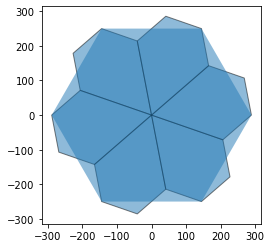

In [2]:
d = 500
offset_a = np.degrees(np.arctan(1 / 3 / np.sqrt(3)))
sf = 1 / np.sqrt(7)

tile = tiling_utils.get_regular_polygon(d, 6)

hex = affine.scale(tile, sf, sf)
hex = affine.translate(hex, 0, hex.bounds[3] - hex.bounds[1])
hex_p = [p for p in hex.exterior.coords]
hex = geom.Polygon([(0, 0)] + hex_p[1:5])
hexes = [affine.rotate(
    hex, a + offset_a, origin = (0, 0)) for a in range(30, 360, 60)]

hexes_gs = gpd.GeoSeries(hexes)

ax = hexes_gs.plot(alpha = 0.5, edgecolor = "k")
gpd.GeoSeries([tile]).plot(ax = ax, alpha = 0.5)